<a href="https://colab.research.google.com/github/ShinwooChoi/ESAA/blob/main/YB0321(1)_chipotle_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

In [21]:
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t',index_col=0)
data.head()

,quantity,item_name,choice_description,item_price
order_id,,,,
1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,Izze,[Clementine],$3.39
1,1,Nantucket Nectar,[Apple],$3.39
1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 3. Assign it to a variable called chipo.

In [22]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t',index_col=0)

### Step 4. See the first 10 entries

In [23]:
chipo.head(10)

,quantity,item_name,choice_description,item_price
order_id,,,,
1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,Izze,[Clementine],$3.39
1,1,Nantucket Nectar,[Apple],$3.39
1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
3,1,Side of Chips,NaN,$1.69
4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25


### Step 5. Create a histogram of the top 5 items bought

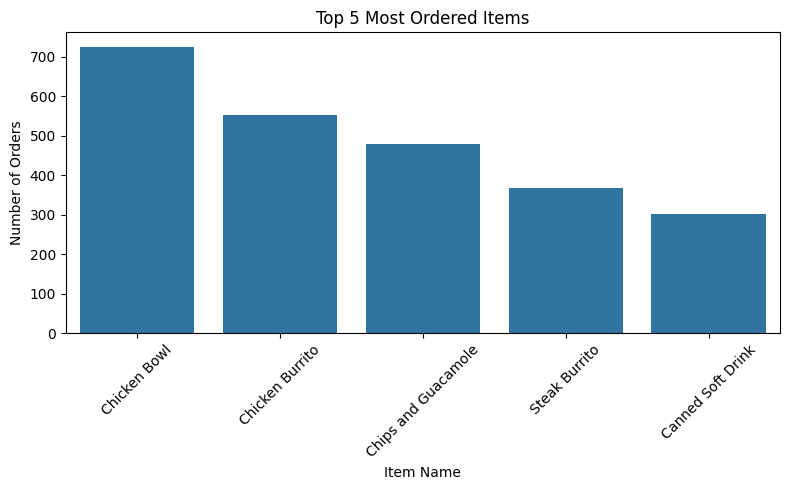

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상위 5개 아이템 주문 횟수 계산
top_items = chipo['item_name'].value_counts().head(5).reset_index()
top_items.columns = ['item_name', 'order_count']

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=top_items, x='item_name', y='order_count')
plt.title('Top 5 Most Ordered Items')
plt.xlabel('Item Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

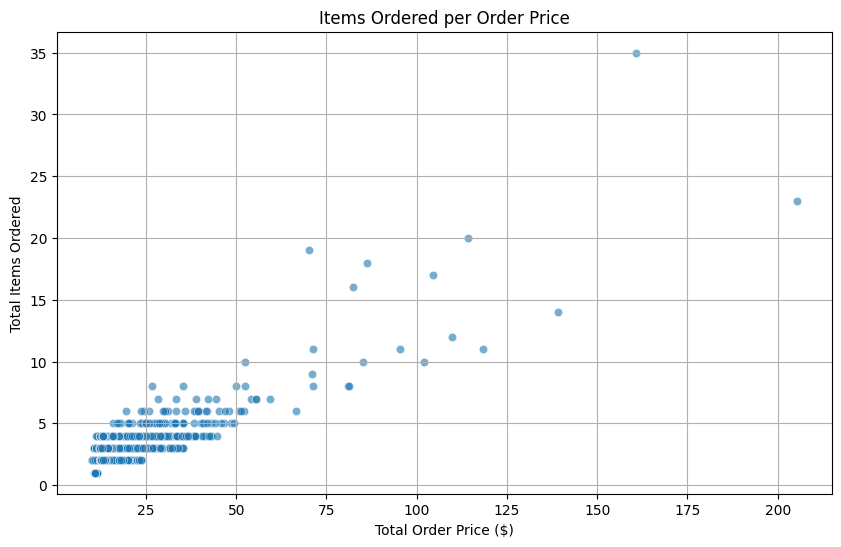

In [33]:
#item_price를 float로 변환
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)

#주문별로 총 가격과 총 수량 집계
order_summary = chipo.groupby('order_id').agg({
    'item_price': 'sum',
    'quantity': 'sum'
}).reset_index()

#시각화 (Price = X축, Quantity = Y축)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=order_summary, x='item_price', y='quantity', alpha=0.6)
plt.title('Items Ordered per Order Price')
plt.xlabel('Total Order Price ($)')
plt.ylabel('Total Items Ordered')
plt.grid(True)
plt.show()


### Step 7. BONUS: Create a question and a graph to answer your own question.

##가장 많은 수익을 올린 아이템은 무엇일까?

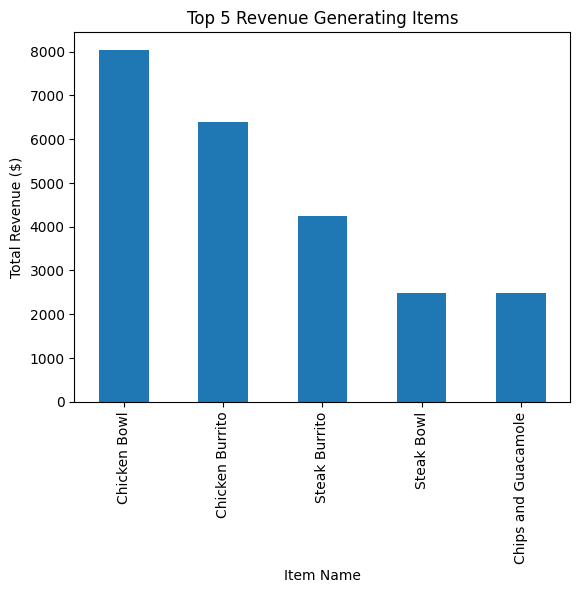

In [35]:
# 각 아이템 별로 총 수익을 계산합니다.
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
revenue_per_item = chipo.groupby('item_name')['revenue'].sum().sort_values(ascending=False).head(5)

# 그래프를 출력합니다.
revenue_per_item.plot(kind='bar')
plt.xlabel('Item Name')
plt.ylabel('Total Revenue ($)')
plt.title('Top 5 Revenue Generating Items')
plt.show()